In [5]:
from deepchem.data.data_loader import DFTYamlLoader
#name of the yaml file
inputs = 'assets/dft_tutorial.yaml'
data = DFTYamlLoader()
dataset = data.create_dataset(inputs)

In [6]:
# Example: training a function using XCModel
from deepchem.models.dft.dftxc import XCModel
import deepchem as dc
import tempfile

# create a file to save the model
model_dir = tempfile.mkdtemp()

# initialise the model
model = XCModel("lda_x",
                batch_size=1,
                log_frequency=1,
                mode="classification",
                n_tasks=2,
                model_dir=model_dir)

# Calculate the loss on fitting the model
loss = model.fit(dataset, nb_epoch=10, checkpoint_interval=1)

/home/rakshit/deepchem/deepchem/utils/differentiation_utils/optimize/rootsolver.py:178: ConvergenceWarning: The rootfinder does not converge after 50 iterations. Best |dx|=7.167e-02, |f|=2.589e-01 at iter 48
  warnings.warn(ConvergenceWarning(msg))


In [7]:
# load the datasets
import numpy as np
inputs = 'assets/h2.yaml'
data = DFTYamlLoader()
h2_dataset = data.create_dataset(inputs)
predict = model.predict(h2_dataset)

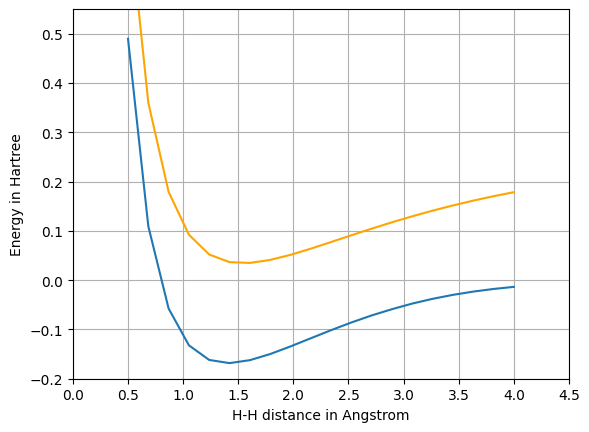

In [8]:
import matplotlib.pyplot as plt 
#plot
true_val = (h2_dataset.y) 
predict_val = (predict)*(-1)
pos = np.array([0.5000, 0.6842, 0.8684, 1.0526, 1.2368,
                1.4211, 1.6053, 1.7895, 1.9737, 2.1579,
                2.3421, 2.5263, 2.7105, 2.8974, 3.0789,
                3.2632, 3.4474, 3.6316, 3.8158, 4.000]) 
plt.plot(pos, true_val )
plt.plot(pos, predict_val, color = 'orange')
y = pos * 0
plt.xlabel("H-H distance in Angstrom") 
plt.ylabel("Energy in Hartree")
plt.xlim([0.0, 4.5])
plt.ylim([-0.2, 0.55])
plt.grid()
plt.show()